In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import neighbors
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()
os.chdir('C:/Users/jjk84/Downloads/kaggle')

In [3]:
# Forceasting with decompasable model
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Datetime operations
import time

# Visualisation
import seaborn as sns
plt.style.use('fivethirtyeight')
import pickle
import gc
import warnings
warnings.filterwarnings("ignore")

C:\Users\jjk84\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
start = time.time()
prop = pd.read_csv('./properties_2016.csv')
train = pd.read_csv("./train_2016_v2.csv", parse_dates=["transactiondate"])
df_train = train.merge(prop, how='left', on='parcelid')
prop2 = pd.read_csv('./properties_2017.csv')
train2 = pd.read_csv("./train_2017.csv", parse_dates=["transactiondate"])
df_train2 = train2.merge(prop2, how='left', on='parcelid')
end = time.time()

In [5]:
df_train_total = df_train.append(df_train2)

In [6]:
df_train['transaction_month'] = df_train['transactiondate'].dt.month
df_train['transaction_year'] = df_train['transactiondate'].dt.year
df_train2['transaction_month'] = df_train2['transactiondate'].dt.month
df_train2['transaction_year'] = df_train2['transactiondate'].dt.year
df_train_total['transaction_month'] = df_train_total['transactiondate'].dt.month
df_train_total['transaction_year'] = df_train_total['transactiondate'].dt.year

In [7]:
df_train.loc[:,'abs_logerror'] = df_train['logerror'].abs()
df_train2.loc[:,'abs_logerror'] = df_train2['logerror'].abs()
df_train_total.loc[:,'abs_logerror'] = df_train_total['logerror'].abs()

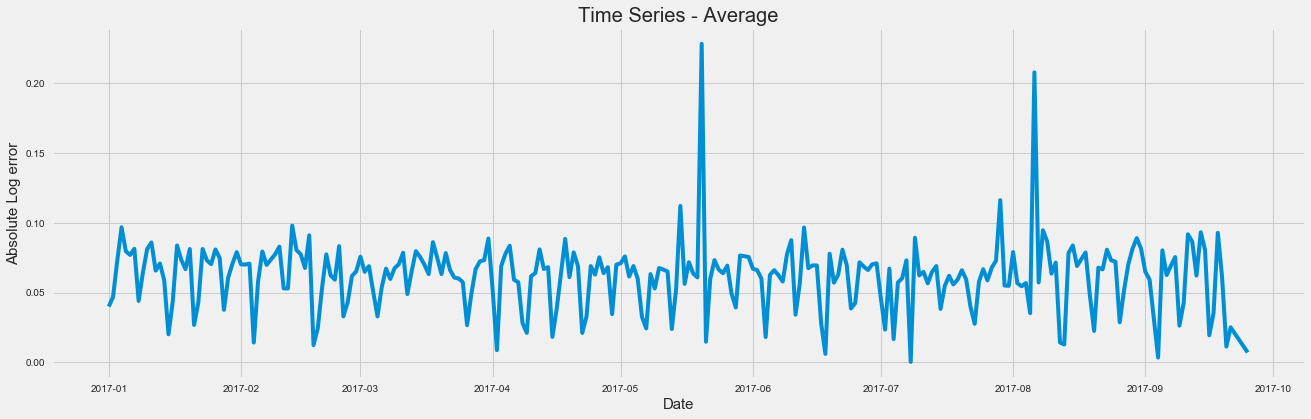

In [8]:
plt.figure(figsize=(20, 6))
mean_group = df_train2[['transactiondate','abs_logerror']].groupby(['transactiondate'])['abs_logerror'].mean()
plt.plot(mean_group)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Absolute Log error', fontsize=15)
plt.title('Time Series - Average')
plt.show()

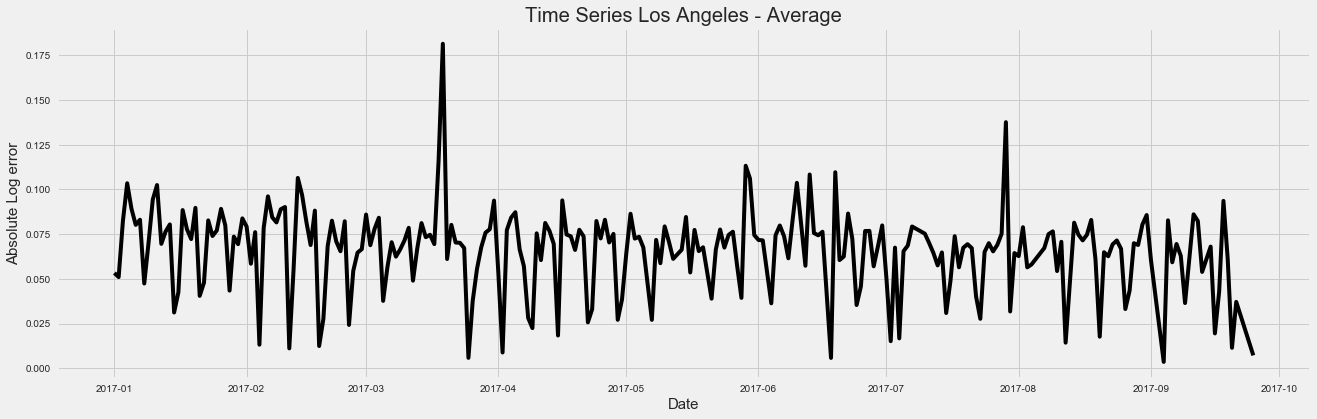

In [13]:
plt.figure(figsize=(20, 6)) 
fips1 = pd.DataFrame(df_train2.loc[df_train2['fips']==6037].groupby('transactiondate')['abs_logerror'].mean())
plt.plot(fips1,c='k')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Absolute Log error', fontsize=15)
plt.title('Time Series Los Angeles - Average')
plt.show()

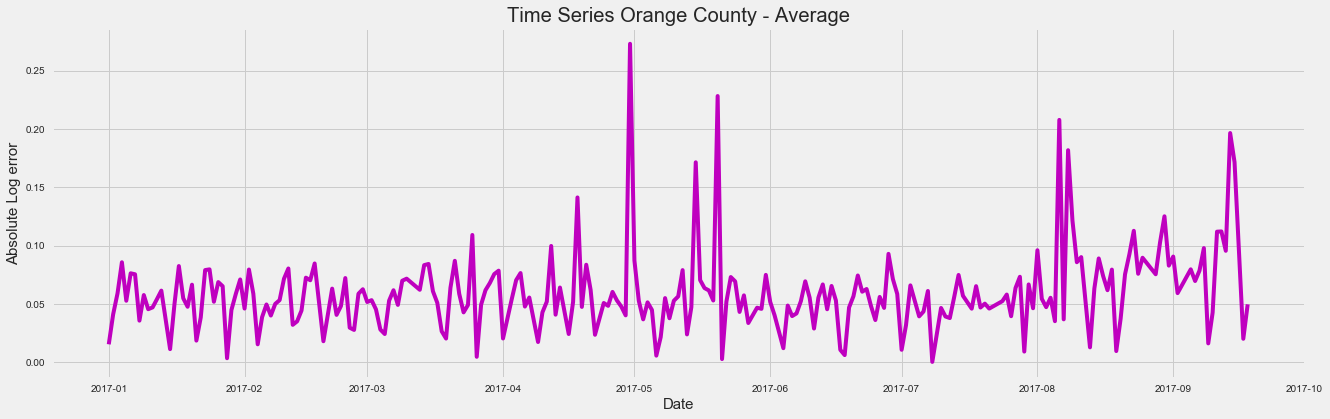

In [14]:
plt.figure(figsize=(20, 6)) 
fips2 = pd.DataFrame(df_train2.loc[df_train2['fips']==6059].groupby('transactiondate')['abs_logerror'].mean())
plt.plot(fips2, c = 'm')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Absolute Log error', fontsize=15)
plt.title('Time Series Orange County - Average')
plt.show()

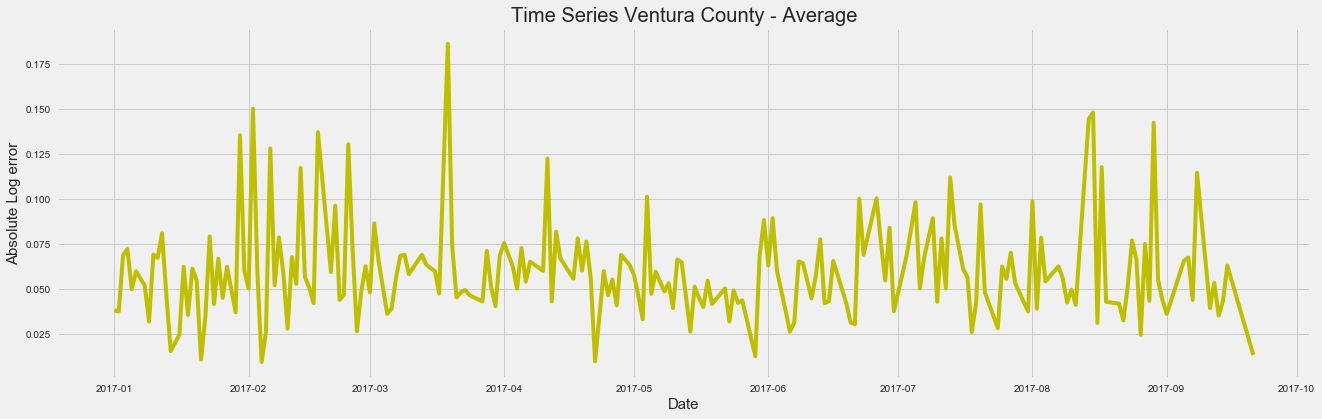

In [15]:
plt.figure(figsize=(20, 6))
fips3 = pd.DataFrame(df_train2.loc[df_train2['fips']==6111].groupby('transactiondate')['abs_logerror'].mean())
plt.plot(fips3, c = 'y')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Absolute Log error', fontsize=15)
plt.title('Time Series Ventura County - Average')
plt.show()

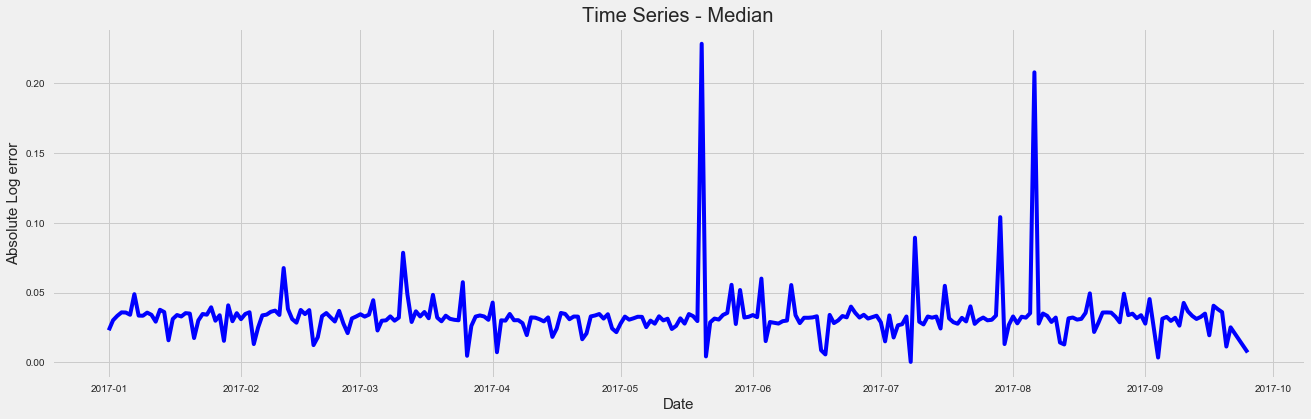

In [16]:
plt.figure(figsize=(20, 6))
median_group = df_train2[['transactiondate','abs_logerror']].groupby(['transactiondate'])['abs_logerror'].median()
plt.plot(median_group, c='b')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Absolute Log error', fontsize=15)
plt.title('Time Series - Median')
plt.show()

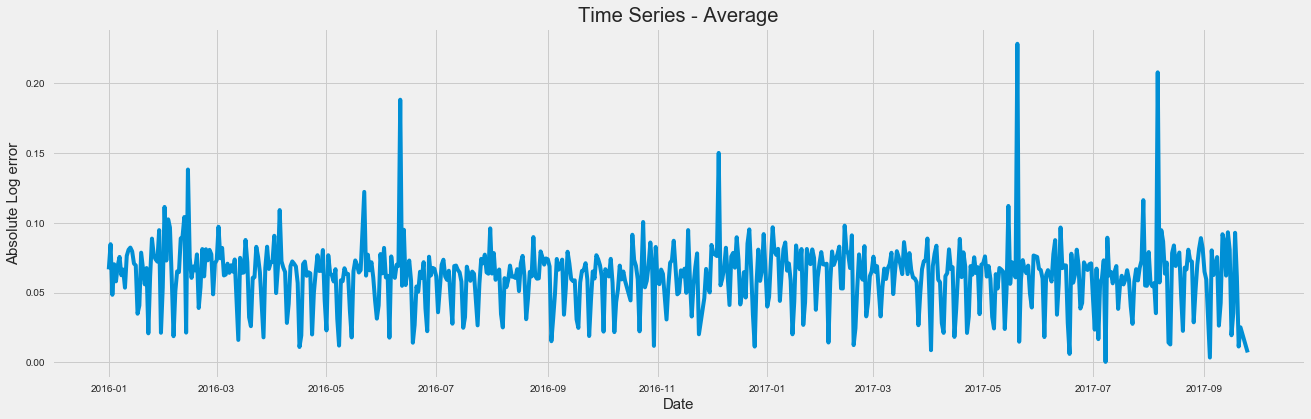

In [9]:
plt.figure(figsize=(20, 6))
mean_group = df_train_total[['transactiondate','abs_logerror']].groupby(['transactiondate'])['abs_logerror'].mean()
plt.plot(mean_group)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Absolute Log error', fontsize=15)
plt.title('Time Series - Average')
plt.show()

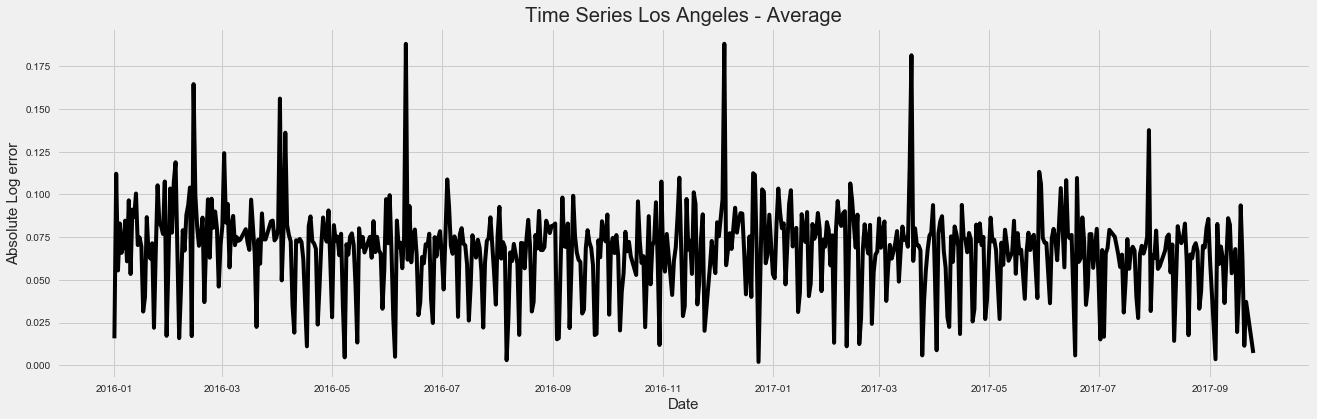

In [10]:
plt.figure(figsize=(20, 6)) 
fips1_total = pd.DataFrame(df_train_total.loc[df_train_total['fips']==6037].groupby('transactiondate')['abs_logerror'].mean())
plt.plot(fips1_total,c='k')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Absolute Log error', fontsize=15)
plt.title('Time Series Los Angeles - Average')
plt.show()

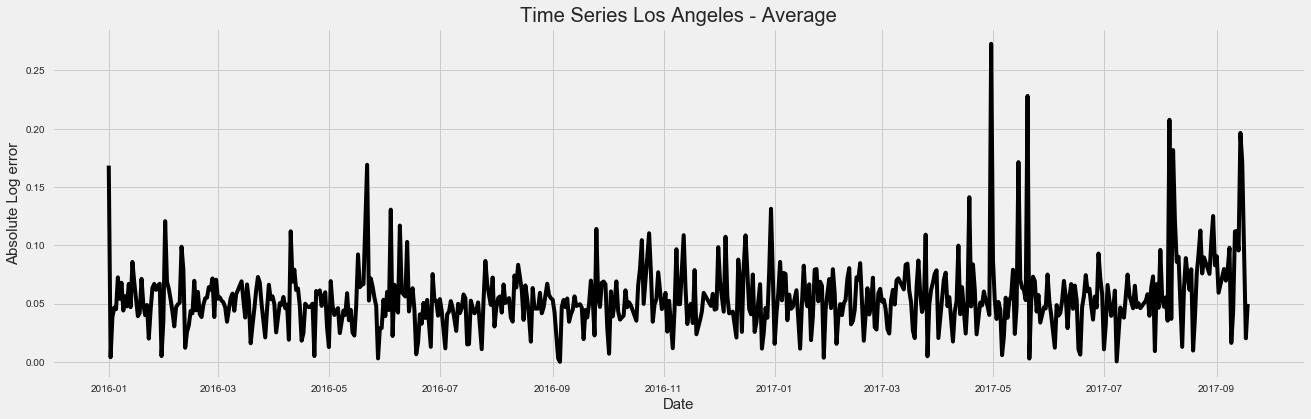

In [11]:
plt.figure(figsize=(20, 6)) 
fips2_total = pd.DataFrame(df_train_total.loc[df_train_total['fips']==6059].groupby('transactiondate')['abs_logerror'].mean())
plt.plot(fips2_total,c='k')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Absolute Log error', fontsize=15)
plt.title('Time Series Los Angeles - Average')
plt.show()

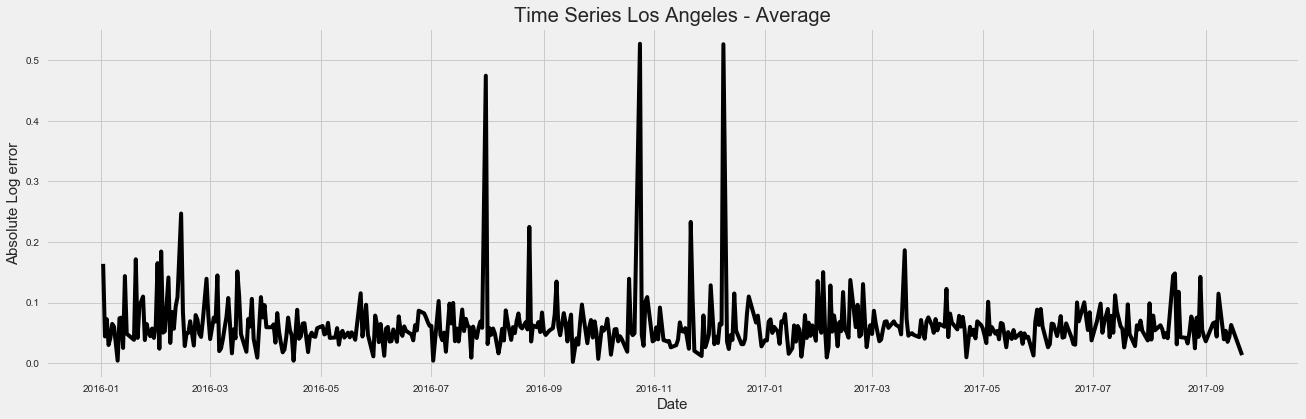

In [12]:
plt.figure(figsize=(20, 6)) 
fips3_total = pd.DataFrame(df_train_total.loc[df_train_total['fips']==6111].groupby('transactiondate')['abs_logerror'].mean())
plt.plot(fips3_total,c='k')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Absolute Log error', fontsize=15)
plt.title('Time Series Los Angeles - Average')
plt.show()

In [21]:
times_series_means =  pd.DataFrame(mean_group).reset_index(drop=False)
df_date_index = times_series_means[['transactiondate','abs_logerror']].set_index('transactiondate')
fips1_series_means = pd.DataFrame(fips1_total).reset_index(drop=False)
df_date_fips1 = fips1_series_means[['transactiondate','abs_logerror']].set_index('transactiondate')
fips2_series_means = pd.DataFrame(fips2_total).reset_index(drop=False)
df_date_fips2 = fips2_series_means[['transactiondate','abs_logerror']].set_index('transactiondate')
fips3_series_means = pd.DataFrame(fips3_total).reset_index(drop=False)
df_date_fips3 = fips3_series_means[['transactiondate','abs_logerror']].set_index('transactiondate')

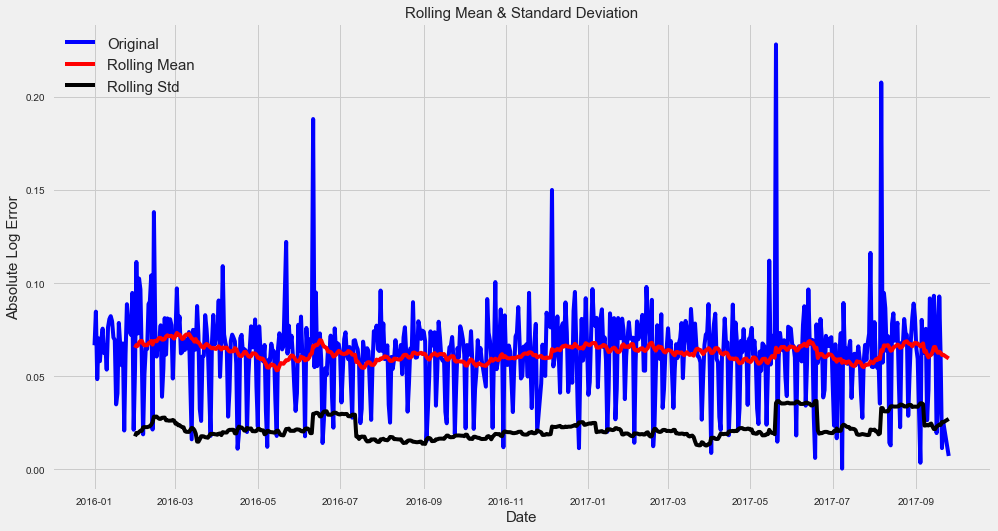

Results of Dickey-Fuller Test:
Test Statistic                  -4.687837
p-value                          0.000089
#Lags Used                      19.000000
Number of Observations Used    596.000000
Critical Value (1%)             -3.441370
Critical Value (5%)             -2.866402
Critical Value (10%)            -2.569359
dtype: float64


In [22]:
def test_stationarity(timeseries):
    plt.figure(figsize=(15, 8))
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=31) # Slide window depend on past 1 month
    rolstd = pd.rolling_std(timeseries, window=31)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best', fontsize=15)
    plt.title('Rolling Mean & Standard Deviation', fontsize=15)
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Absolute Log Error', fontsize=15)
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = sm.tsa.adfuller(timeseries['abs_logerror'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(df_date_index)   

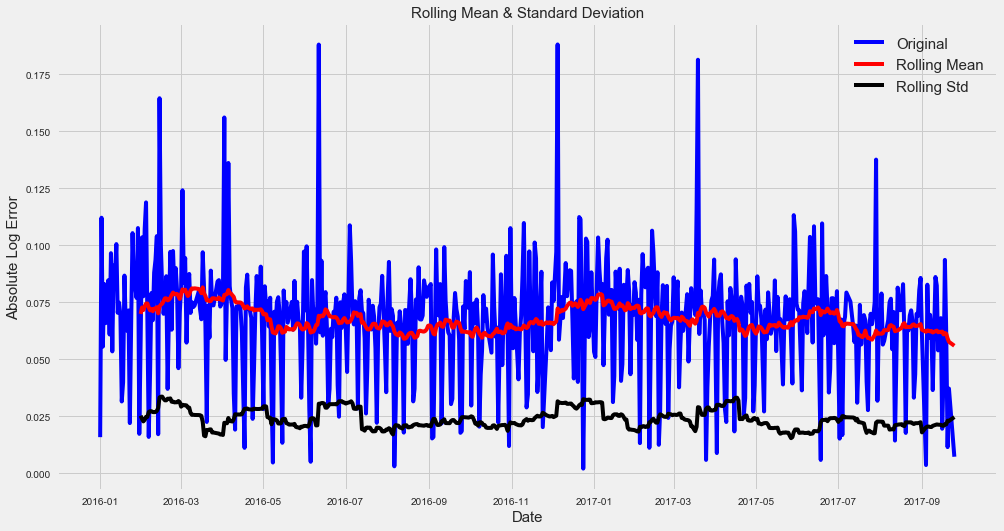

Results of Dickey-Fuller Test:
Test Statistic                -7.076933e+00
p-value                        4.775155e-10
#Lags Used                     6.000000e+00
Number of Observations Used    5.930000e+02
Critical Value (1%)           -3.441426e+00
Critical Value (5%)           -2.866426e+00
Critical Value (10%)          -2.569372e+00
dtype: float64


In [23]:
test_stationarity(df_date_fips1)  

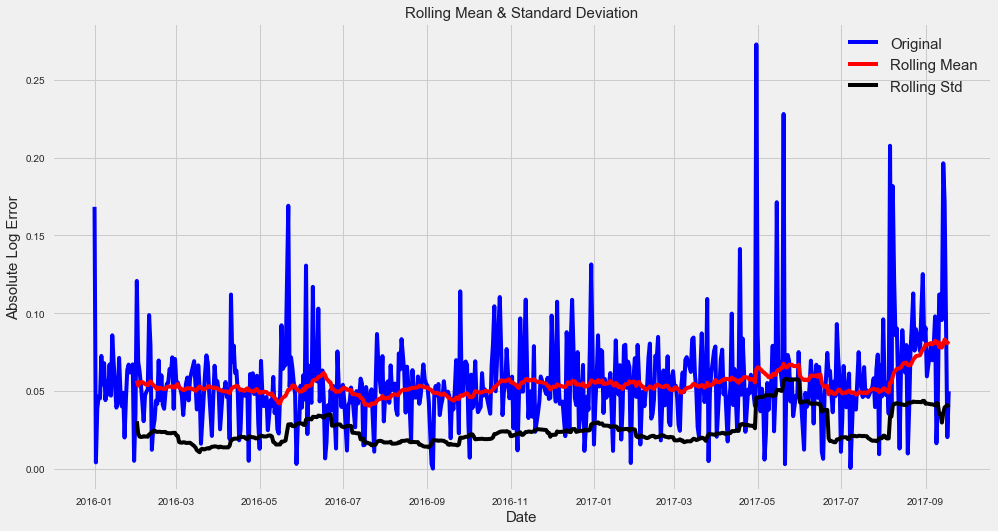

Results of Dickey-Fuller Test:
Test Statistic                -1.170032e+01
p-value                        1.574404e-21
#Lags Used                     2.000000e+00
Number of Observations Used    5.730000e+02
Critical Value (1%)           -3.441814e+00
Critical Value (5%)           -2.866597e+00
Critical Value (10%)          -2.569463e+00
dtype: float64


In [24]:
test_stationarity(df_date_fips2)

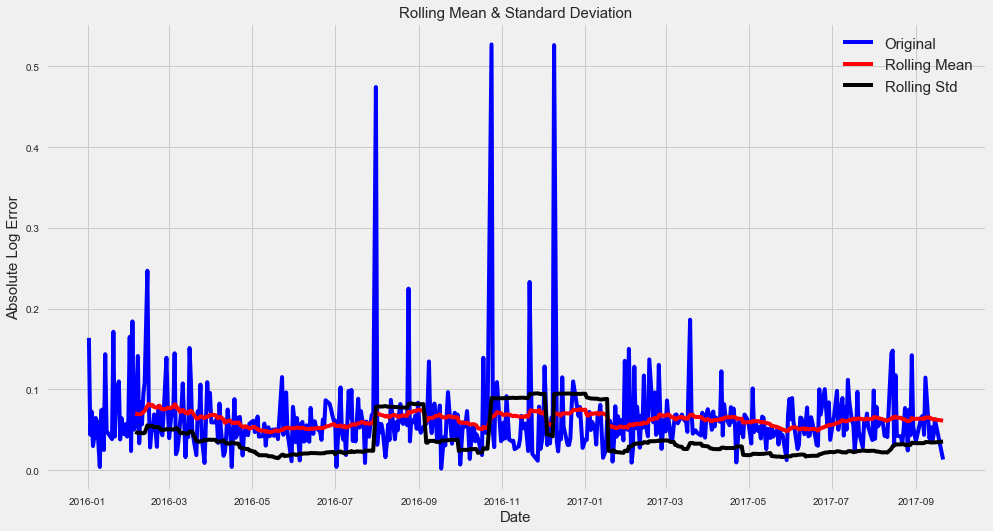

Results of Dickey-Fuller Test:
Test Statistic                 -23.453876
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    506.000000
Critical Value (1%)             -3.443340
Critical Value (5%)             -2.867269
Critical Value (10%)            -2.569821
dtype: float64


In [25]:
test_stationarity(df_date_fips3)

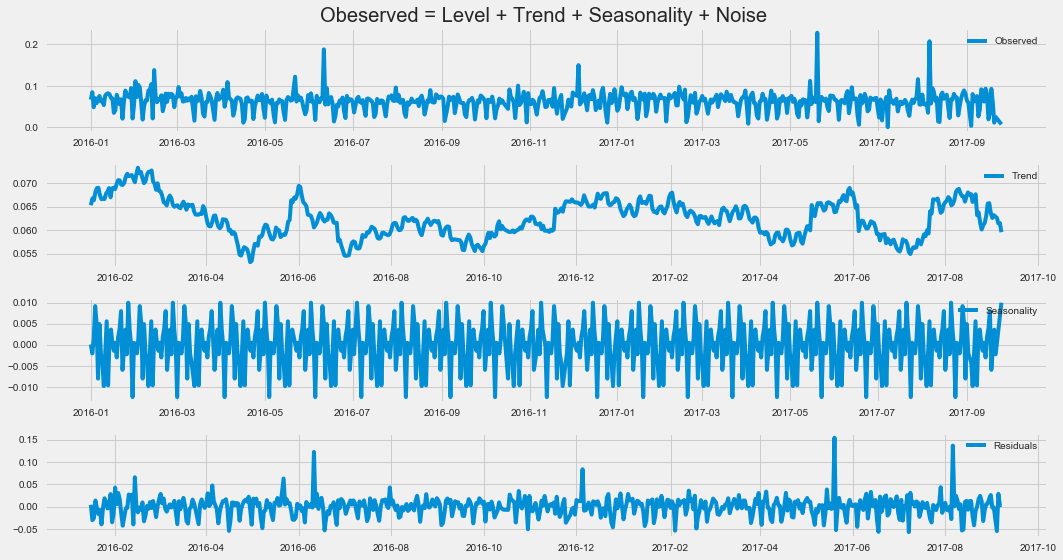

In [26]:
decomposition = sm.tsa.seasonal_decompose(df_date_index, model='additive',freq = 31)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
rcParams['figure.figsize'] = 15, 8

plt.subplot(411)
plt.title('Obeserved = Level + Trend + Seasonality + Noise ')
plt.plot(df_date_index, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

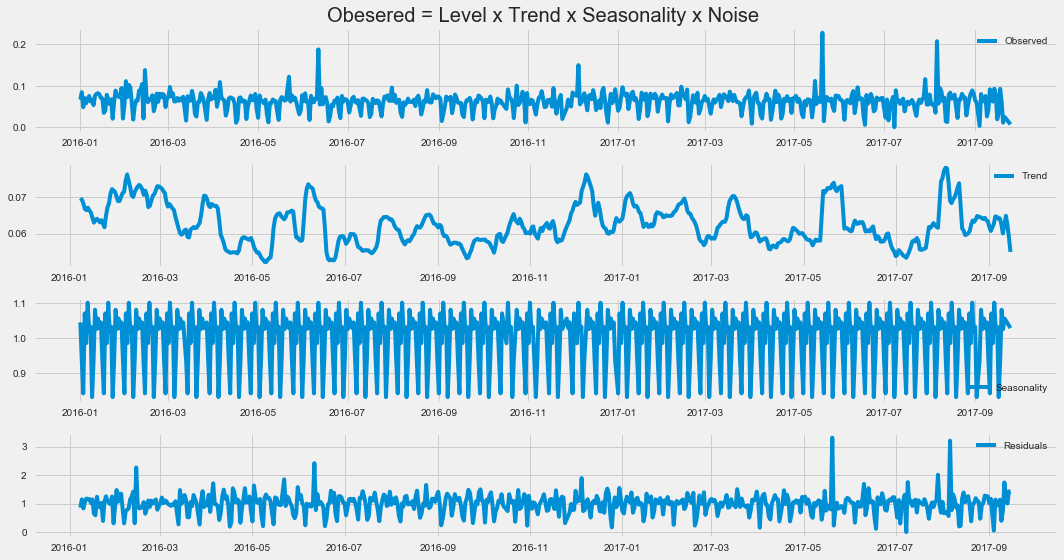

In [28]:
times_series_means =  pd.DataFrame(mean_group).reset_index(drop=False)
df_date_index = times_series_means[['transactiondate','abs_logerror']].set_index('transactiondate')
decomposition = sm.tsa.seasonal_decompose(df_date_index, model='multiplicative',freq = 14)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
rcParams['figure.figsize'] = 15, 8

plt.subplot(411)
plt.title('Obesered = Level x Trend x Seasonality x Noise ')
plt.plot(df_date_index, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [31]:
trend

abs_logerror
transactiondate              
2016-01-01                NaN
2016-01-02                NaN
2016-01-03                NaN
2016-01-04                NaN
2016-01-05                NaN
2016-01-06                NaN
2016-01-07                NaN
2016-01-08           0.069768
2016-01-09           0.069373
2016-01-10           0.068348
2016-01-11           0.066811
2016-01-12           0.066490
2016-01-13           0.067142
2016-01-14           0.066360
2016-01-15           0.065844
2016-01-16           0.064397
2016-01-17           0.063067
2016-01-18           0.063807
2016-01-19           0.064113
2016-01-20           0.063681
2016-01-21           0.063122
2016-01-22           0.063715
2016-01-23           0.062848
2016-01-24           0.061790
2016-01-25           0.064972
2016-01-26           0.067290
2016-01-27           0.068349
2016-01-28           0.071064
2016-01-29           0.072246
2016-01-30           0.071899
...                       ...
2017-08-23           0.063912
2017-08-24           0.064891
2017-08-25           0.064669
2017-08-26           0.064580
2017-08-27           0.064300
2017-08-28           0.064060
2017-08-29           0.064355
2017-08-30           0.063800
2017-08-31           0.063472
2017-09-01           0.061917
2017-09-02           0.060777
2017-09-04           0.062720
2017-09-05           0.064754
2017-09-06           0.064653
2017-09-07           0.064116
2017-09-08           0.064235
2017-09-09           0.062579
2017-09-10           0.060100
2017-09-11           0.062435
2017-09-12           0.064938
2017-09-13           0.062425
2017-09-14           0.059024
2017-09-15           0.055011
2017-09-16                NaN
2017-09-17                NaN
2017-09-18                NaN
2017-09-19                NaN
2017-09-20                NaN
2017-09-21                NaN
2017-09-25                NaN

[616 rows x 1 columns]